<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week12_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (05 | 2141720025)

Diah Putri Nofianti (12 | 2141720054)

[Jobsheet](https://drive.google.com/file/d/1loGU6BcviqCPFogYtoflA13qgkG13zvg/view)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path_drive = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week12'
faces_path = f'{path_drive}/Face Detection'

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

# Contoh

In [3]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [4]:
reeses = cv.imread(f'{faces_path}/reeses_puffs.png',0)
# display(reeses)

In [5]:
cereals = cv.imread(f'{faces_path}/many_cereals.jpg',0)
# display(cereals)

## ORB (Orient FASE and Rotated BRIEF)

In [6]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck=True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [7]:
len(matches)

139

(None, (-0.5, 1316.5, 559.5, -0.5))

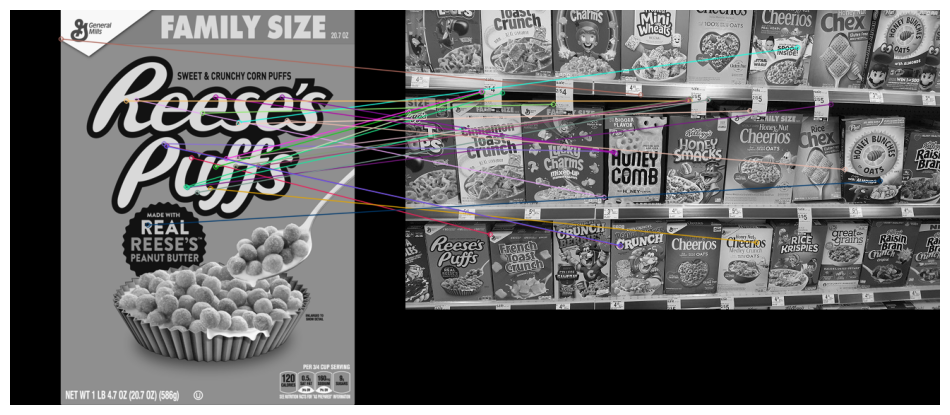

In [8]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match),plt.axis('off')

## SIFT (Scale-Invariant Feature Transform)

In [9]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

for match1,match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [10]:
len(matches)

1501

(None, (-0.5, 1316.5, 559.5, -0.5))

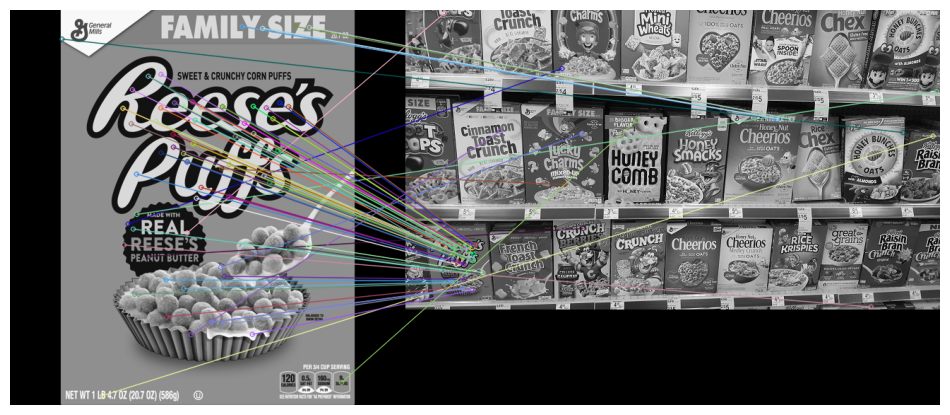

In [11]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches),plt.axis('off')

## Face Detection

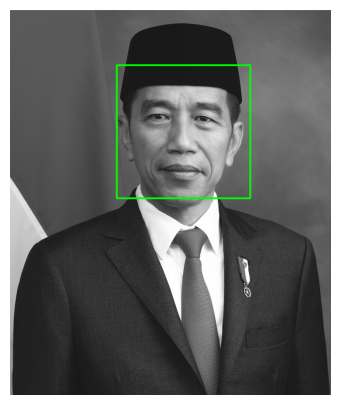

In [12]:
cascade_wajah = cv.CascadeClassifier(f'{faces_path}/haarcascade_frontalface_alt.xml')
presiden = cv.imread(f'{faces_path}/jokowi.jpg', cv.IMREAD_GRAYSCALE)
presiden = cv.cvtColor(presiden, cv.COLOR_GRAY2RGB)
presiden_img = np.copy(presiden)

roi_wajah = cascade_wajah.detectMultiScale(presiden)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(presiden_img,(x,y),(x+w,y+h),(0,255,0),3)
  plt.figure(figsize = (5,5))
  plt.imshow(presiden_img, cmap='gray'),plt.axis('off')

# Praktikum

Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

(<Axes: >,
 (-0.5, 872.5, 1049.5, -0.5))

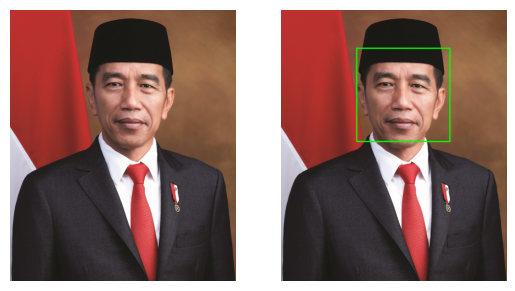

In [13]:
jokowi = cv.imread(f'{faces_path}/jokowi.jpg')
jokowi = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi_img = np.copy(jokowi)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.subplot(121),plt.imshow(jokowi),plt.axis('off')
plt.subplot(122),plt.imshow(jokowi_img),plt.axis('off')

(<Axes: >,
 (-0.5, 533.5, 699.5, -0.5))

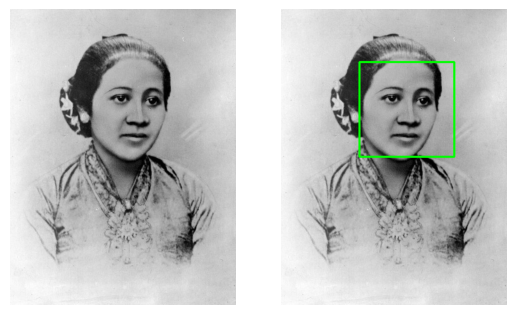

In [14]:
kartini = cv.imread(f'{faces_path}/kartini.jpg')
kartini_img = np.copy(kartini)

roi_wajah = cascade_wajah.detectMultiScale(kartini_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(kartini_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.subplot(121),plt.imshow(kartini),plt.axis('off')
plt.subplot(122),plt.imshow(kartini_img),plt.axis('off')

(<Axes: >,
 (-0.5, 725.5, 479.5, -0.5))

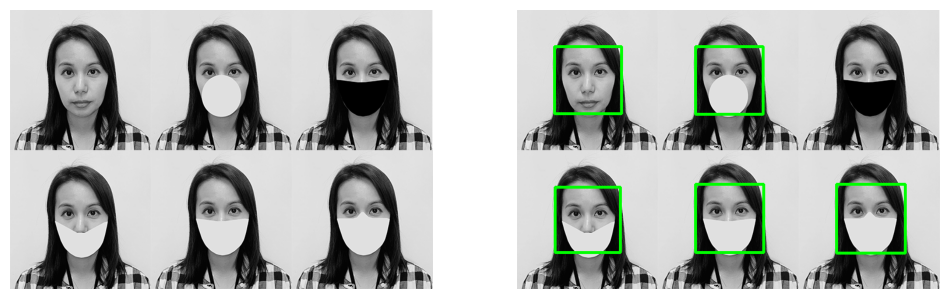

In [15]:
mask = cv.imread(f'{faces_path}/mask.png',cv.IMREAD_GRAYSCALE)
mask = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)
mask_img = np.copy(mask)

roi_wajah = cascade_wajah.detectMultiScale(mask_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mask_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (12,12))
plt.subplot(121),plt.imshow(mask,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mask_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 397.5, 567.5, -0.5))

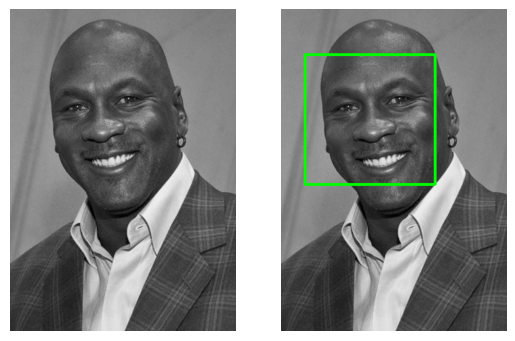

In [16]:
mjordan = cv.imread(f'{faces_path}/mjordan.jpg',0)
mjordan = cv.cvtColor(mjordan, cv.COLOR_GRAY2RGB)
mjordan_img = np.copy(mjordan)

roi_wajah = cascade_wajah.detectMultiScale(mjordan_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(mjordan_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.subplot(121),plt.imshow(mjordan,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mjordan_img,cmap='gray'),plt.axis('off')

(<Axes: >,
 (-0.5, 1049.5, 759.5, -0.5))

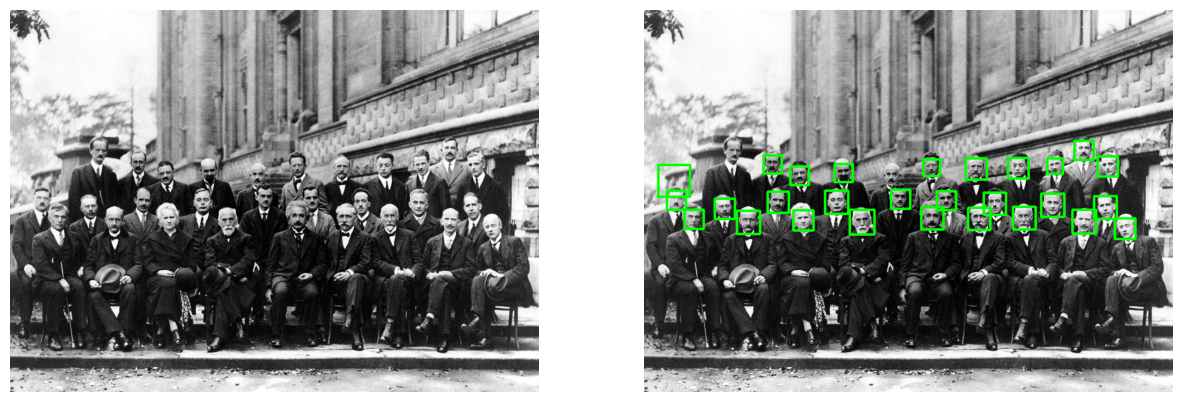

In [17]:
solvayconf = cv.imread(f'{faces_path}/solvayconf.jpg')
solvayconf_img = np.copy(solvayconf)

roi_wajah = cascade_wajah.detectMultiScale(solvayconf_img)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(solvayconf_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (15,15))
plt.subplot(121),plt.imshow(solvayconf),plt.axis('off')
plt.subplot(122),plt.imshow(solvayconf_img),plt.axis('off')

## Cat Face Detection

(<Axes: >,
 (-0.5, 599.5, 399.5, -0.5))

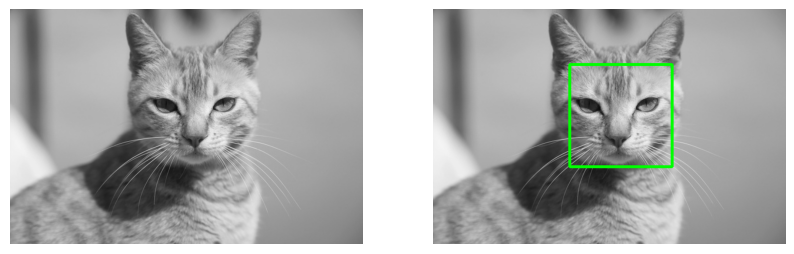

In [18]:
cascade_kucing = cv.CascadeClassifier(f'{faces_path}/haarcascade_frontalcatface.xml')
kucing = cv.imread(f'{faces_path}/mycat.jpg', cv.IMREAD_GRAYSCALE)
kucing = cv.cvtColor(kucing, cv.COLOR_GRAY2RGB)
kucing_img = np.copy(kucing)

roi_kucing = cascade_kucing.detectMultiScale(kucing, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
filtered_roi_kucing = [roi for roi in roi_kucing if roi[2] > 150 and roi[3] > 150]

for (x,y,w,h) in filtered_roi_kucing:
  cv.rectangle(kucing_img,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (10,10))
plt.subplot(121),plt.imshow(kucing),plt.axis('off')
plt.subplot(122),plt.imshow(kucing_img),plt.axis('off')

## Eye Detection

(<Axes: >,
 (-0.5, 872.5, 1049.5, -0.5))

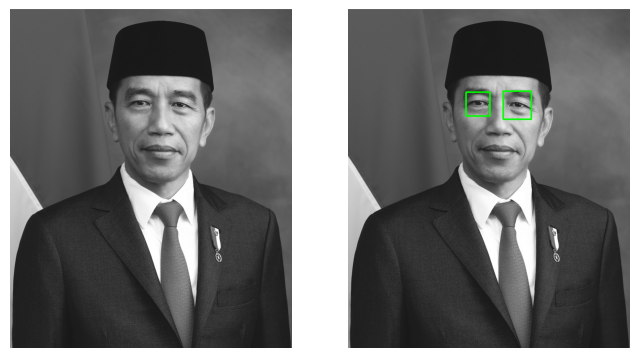

In [19]:
cascade_mata = cv.CascadeClassifier(f'{faces_path}/haarcascade_eye.xml')
jokowi_eyes = np.copy(presiden)

roi_mata = cascade_mata.detectMultiScale(jokowi_eyes)
for (x,y,w,h) in roi_mata:
  cv.rectangle(jokowi_eyes,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(figsize = (8,8))
plt.subplot(121),plt.imshow(presiden),plt.axis('off')
plt.subplot(122),plt.imshow(jokowi_eyes),plt.axis('off')

## Face Tracking
[klik disini](https://www.youtube.com/watch?v=YjWh7QvVH60)

In [20]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [21]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [22]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [23]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


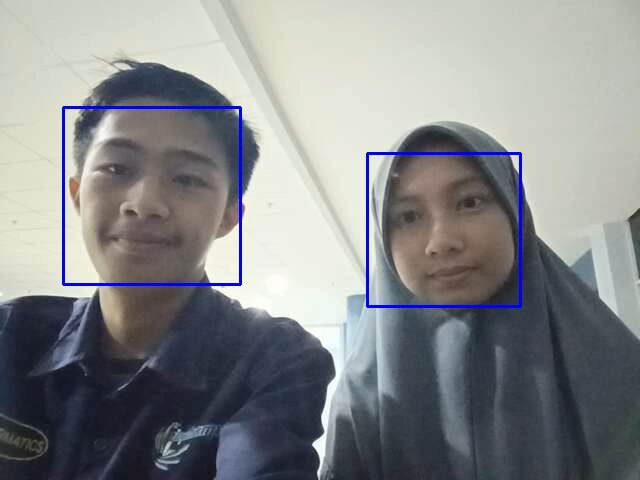

In [24]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Face Blurring

(<Axes: >,
 (-0.5, 397.5, 567.5, -0.5))

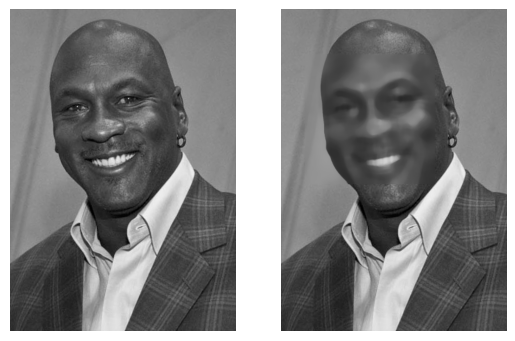

In [25]:
mjordan = cv.imread(f'{faces_path}/mjordan.jpg',0)
mjordan = cv.cvtColor(mjordan, cv.COLOR_GRAY2RGB)
mjordan_img = np.copy(mjordan)

roi_wajah = cascade_wajah.detectMultiScale(mjordan_img)
for (x,y,w,h) in roi_wajah:
  roi = mjordan_img[y:(y+h),x:(x+w)]
  img_blur = cv2.medianBlur(roi, 15)

mjordan_img[y:(y+h),x:(x+w)] = img_blur
plt.subplot(121),plt.imshow(mjordan,cmap='gray'),plt.axis('off')
plt.subplot(122),plt.imshow(mjordan_img,cmap='gray'),plt.axis('off')

## Segmentasi karakter pada KTP

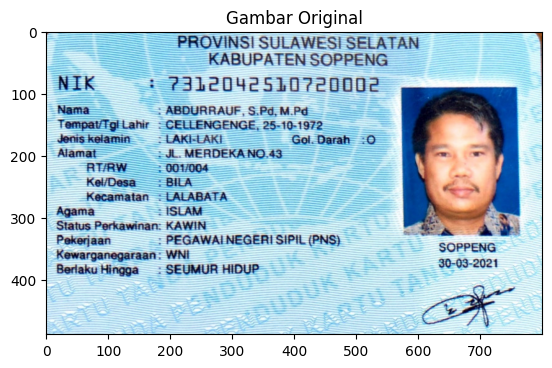

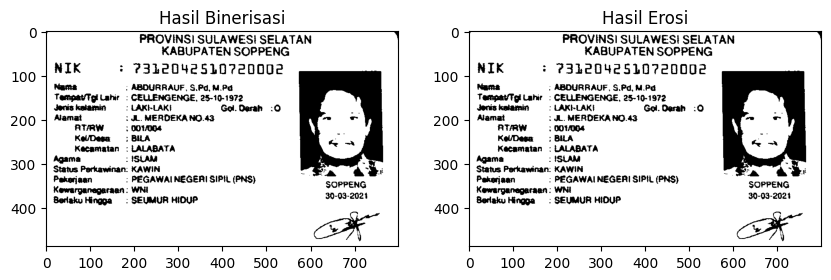

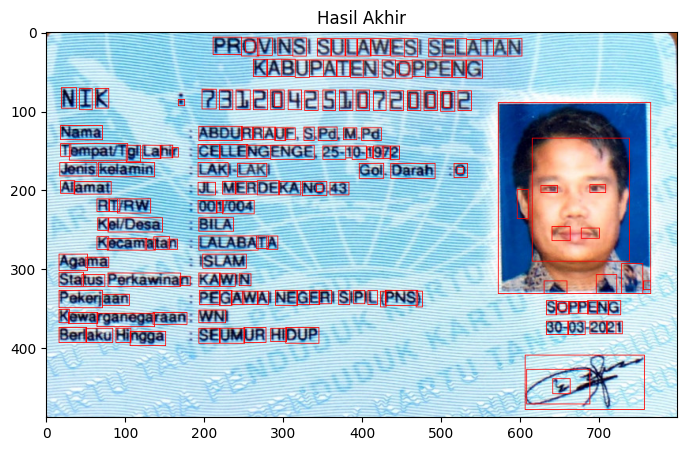

In [26]:
# Baca gambar
ktpAbdur = cv.imread(f'{path_drive}/KTP_More/KTP7.jpeg')
ori = cv.cvtColor(ktpAbdur.copy(), cv.COLOR_BGR2RGB)

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktpAbdur, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(ktpAbdur, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(ktpAbdur, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(ktpAbdur, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar matplotlib
plt.subplots(1)
plt.title("Gambar Original")
plt.imshow(ori)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Hasil Binerisasi')
axs[0].imshow(bw, cmap='gray')

axs[1].set_title('Hasil Erosi')
axs[1].imshow(erode, cmap='gray')

fig1, axs1 = plt.subplots(figsize=(10, 5))
axs1.set_title('Hasil Akhir')
axs1.imshow(cv.cvtColor(ktpAbdur, cv.COLOR_BGR2RGB))

plt.show()


## cropping pada bagian NIK saja

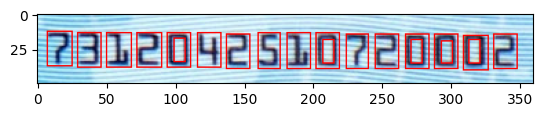

In [27]:
# Crop bagian NIK dari gambar
nik_crop = ktpAbdur[60:110, 190:550]
plt.imshow(cv.cvtColor(nik_crop, cv.COLOR_BGR2RGB))

## Angka
Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [28]:
import os
from tqdm import tqdm
import random
import pickle

# Direktori data training
DATADIR = f"{path_drive}/data/train"

In [29]:
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)

    for img in tqdm(os.listdir(path)):
      try:
          img_array = cv.imread(os.path.join(path,img), cv.IMREAD_GRAYSCALE)
          new_array = cv.resize(img_array, (width, height))
          training_data.append([new_array, class_number])
      except Exception as e:
          pass


random.shuffle(training_data)

X = []
Y = []

for features, label in training_data:
  X.append(features)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 46/46 [00:18<00:00,  2.46it/s]


In [30]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
16/16 [==============================] - 13s 31ms/step - loss: 2.2957 - accuracy: 0.1174
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 2.2481 - accuracy: 0.2045
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 2.2113 - accuracy: 0.2146
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 2.1534 - accuracy: 0.2429
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 2.0725 - accuracy: 0.2733
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 1.9483 - accuracy: 0.4028
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 1.7840 - accuracy: 0.4474
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 1.6410 - accuracy: 0.5081
Epoch 9/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4432 - accuracy: 0.5870
Epoch 10/20
16/16 [==============================] - 0s 11ms/step - loss: 1.2367 - accuracy: 0.6599
Epoch 11

In [32]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = f"{path_drive}/data/train"
data_dir_testing = f"{path_drive}/data/test"

dirs = []
width, height = 100, 100
model = tf.keras.models.load_model("anpr.model")
for char_name in sorted(os.listdir(data_dir_training)):
  dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
  temp = ""
  for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
    img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_ANYCOLOR)
    new_array = cv2.resize(img_array, (width, height))
    new_array = np.array(new_array).reshape(-1, width, height,1)
    new_array = new_array / 255.0
    prediction = model.predict(new_array)
    temp += dirs[np.argmax(prediction[0])]
print("folder name: {} no: {}".format(car, temp))

1/1 [==============================] - 0s 17ms/step
folder name: char english 9 number no: char english 1 numberchar english 9 numberchar english 4 numberchar english 2 numberchar english 2 numberchar english 0 numberchar english 5 numberchar english 8 numberchar english 0 numberchar english 4 numberchar english 5 numberchar english 5 numberchar english 5 numberchar english 4 numberchar english 5 numberchar english 4 numberchar english 4 numberchar english 5 numberchar english 0 numberchar english 8 number


# Tugas

Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!